

**Obesity levels Data Set Analysis Using AutoML**


**Abstract**

**AUTOML:**

Auto ml selects the best model for our dataset by evaluating many models for us.

Here below we are going to use AUTOML to predict the gender of person using other variables such as height,weight,age and obesity level etc (ie: **binary classification** will be done here).

By performing automl we will get the imp variables and the most effective model for our dataset as well. 

In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 39 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=2d3c1b6489ed68ecc6a06881d14dbf2b1ccc1efcb7f7be0fcd589b3e14697630
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [ ]:
# import the library
# importing H20 automl 
#It can do data prepossesing it self like categorical encoding coversion etc. 
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
#mine
import h2o
from h2o.automl import H2OAutoML
import os
import pandas as pd

In [ ]:
h2o.init()
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpooxd5rcr
  JVM stdout: /tmp/tmpooxd5rcr/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpooxd5rcr/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_w1r3k3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
#data2=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
data.name = "data"
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
data.corr().unstack().sort_values().drop_duplicates()
#checking correlation between variables
#mine

TUE     Age      -0.296931
FAF     Age      -0.144938
FCVC    TUE      -0.101135
TUE     Weight   -0.071561
Weight  FAF      -0.051436
Age     CH2O     -0.045304
NCP     Age      -0.043944
Height  FCVC     -0.038121
        Age      -0.025958
TUE     CH2O      0.011965
Age     FCVC      0.016291
FAF     FCVC      0.019939
NCP     TUE       0.036326
FCVC    NCP       0.042216
TUE     Height    0.051912
CH2O    NCP       0.057088
FAF     TUE       0.058562
FCVC    CH2O      0.068461
Weight  NCP       0.107469
NCP     FAF       0.129504
FAF     CH2O      0.167236
Weight  CH2O      0.200575
        Age       0.202560
CH2O    Height    0.213376
FCVC    Weight    0.216125
Height  NCP       0.243672
FAF     Height    0.294709
Height  Weight    0.463136
Age     Age       1.000000
dtype: float64

In [ ]:
#Importing our dataset with H2O.
df = h2o.import_file('/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.types

{'Gender': 'enum',
 'Age': 'real',
 'Height': 'real',
 'Weight': 'real',
 'family_history_with_overweight': 'enum',
 'FAVC': 'enum',
 'FCVC': 'real',
 'NCP': 'real',
 'CAEC': 'enum',
 'SMOKE': 'enum',
 'CH2O': 'real',
 'SCC': 'enum',
 'FAF': 'real',
 'TUE': 'real',
 'CALC': 'enum',
 'MTRANS': 'enum',
 'NObeyesdad': 'enum'}

In [ ]:
df.describe()

Rows:2111
Cols:17

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
type,enum,real,real,real,enum,enum,real,real,enum,enum,real,enum,real,real,enum,enum,enum
mins,,14.0,1.45,39.0,,,1.0,1.0,,,1.0,,0.0,0.0,,,
mean,,24.312599908574136,1.7016773533870204,86.58605812648032,,,2.419043061582189,2.6856280497394596,,,2.0080114040738986,,1.0102976958787304,0.6578659237328283,,,
maxs,,61.0,1.98,173.0,,,3.0,4.0,,,3.0,,3.0,2.0,,,
sigma,,6.345968273732234,0.09330481986792,26.191171745204677,,,0.5339265785033,0.7780386488418612,,,0.6129534517968722,,0.8505924308366978,0.6089272596763782,,,
zeros,,0,0,0,,,0,0,,,0,,411,557,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.8,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [ ]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])
#mine

In [ ]:
df_train

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
Male,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight
Female,23,1.5,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight
Male,22,1.64,53,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight
Male,24,1.78,64,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation,Normal_Weight
Male,22,1.72,68,yes,yes,2,3,Sometimes,no,2,no,1,1,no,Public_Transportation,Normal_Weight
Male,26,1.85,105,yes,yes,3,3,Frequently,no,3,no,2,2,Sometimes,Public_Transportation,Obesity_Type_I
Female,21,1.72,80,yes,yes,2,3,Frequently,no,2,yes,2,1,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "Gender"
x = df.columns
x.remove(y)

In [ ]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which 
#variable will it be using for the prediction purposes. 
#taken from references
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)

AutoML progress: |
01:59:19.40: Project: AutoML_1_20221108_15918
01:59:19.41: Cross-validation disabled by user: no fold column nor nfolds > 1.
01:59:19.43: Setting stopping tolerance adaptively based on the training frame: 0.026162237992630243
01:59:19.43: Build control seed: 10
01:59:19.46: training frame: Frame key: AutoML_1_20221108_15918_training_py_2_sid_8743    cols: 17    rows: 1461  chunks: 8    size: 97055  checksum: 8490993660827783721
01:59:19.46: validation frame: Frame key: py_4_sid_8743    cols: 17    rows: 317  chunks: 8    size: 61849  checksum: 5749109929388489242
01:59:19.46: leaderboard frame: Frame key: py_4_sid_8743    cols: 17    rows: 317  chunks: 8    size: 61849  checksum: 5749109929388489242
01:59:19.47: blending frame: NULL
01:59:19.47: response column: Gender
01:59:19.48: fold column: null
01:59:19.48: weights column: null
01:59:19.94: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 3

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_1_20221108_15918


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 75                          40192                  7            7            7             20            52            37.9733

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0050337120346648934
RMSE: 0.07094865773687965
LogLoss: 0.035400691001017184
Mean Per-Class Error: 0.000689655172413793
AUC: 0.9999925037481259
AUCPR: 0.9999926057196975
Gini: 0.9999850074962517

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5276632930208353
        Female    Male    Error    Rate
------  --------  ------  -------  ------------
Female  724       1       0.0014   (1.0/725.0)
Male    0         736     0        (0.0/736.0)
Total   724       737     0.0007   (1.0/1461.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.527663     0.999321  197
max f2                       0.527663     0.999728  197
max f0point5                 0.527663     0.998914  197
max accuracy                 0.527663     0.999316  197
max precision                0.998558     1         0
max recall                   0.527663     1         197
max specificity              0.998558     1         0
max absolute_mcc             0.527663     0.998632  197
max min_per_class_accuracy   0.56678      0.998621  196
max mean_per_class_accuracy  0.527663     0.99931   197
max tns                      0.998558     725       0
max fns                      0.998558     733       0
max fps                      0.0019118    725       399
max tps                      0.527663     736       197
max tnr                      0.998558     1         0
max fnr                      0.998558     0.995924  0
max fpr                      0.0019118    1         399
max tpr                      0.527663     1         197

Gains/Lift Table: Avg response rate: 50.38 %, avg score: 50.35 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102669                   0.99822            1.98505    1.98505            1                0.998354    1                           0.998354            0.0203804       0.0203804                  98.5054   98.5054            0.0203804
2        0.0205339                   0.998084           1.98505    1.98505            1                0.998154    1                           0.998254            0.0203804       0.0407609                  98.5054   98.5054            0.0407609
3        0.0301164                   0.997977           1.98505    1.98505            1                0.998032    1                           0.998184            0.0190217       0.0597826                  98.5054   98.5054            0.0597826
4        0.0403833                   0.997841           1.98505    1.98505            1                0.997899    1                           0.998111            0.0203804       0.080163                   98.5054   98.5054            0.080163
5        0.0506502                   0.997758           1.98505    1.98505            1                0

In [ ]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .

lb = aml.leaderboard

In [ ]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_1_20221108_15918,0.985805,0.159233,0.984775,0.0472687,0.216011,0.0466608
DRF_1_AutoML_1_20221108_15918,0.985546,0.16589,0.98568,0.0444976,0.215755,0.0465503
GBM_4_AutoML_1_20221108_15918,0.985048,0.161045,0.984619,0.0538477,0.213903,0.0457545
GBM_3_AutoML_1_20221108_15918,0.984091,0.164342,0.98241,0.0475279,0.216659,0.0469413
GBM_1_AutoML_1_20221108_15918,0.978947,0.19137,0.976601,0.0601675,0.236927,0.0561346
XRT_1_AutoML_1_20221108_15918,0.978648,0.222048,0.970836,0.0513357,0.236985,0.0561621
XGBoost_3_AutoML_1_20221108_15918,0.976077,0.194194,0.974629,0.0510766,0.233514,0.0545286
XGBoost_2_AutoML_1_20221108_15918,0.973884,0.210081,0.971505,0.0662281,0.246405,0.0607154
XGBoost_1_AutoML_1_20221108_15918,0.972887,0.214332,0.969133,0.0604266,0.249947,0.0624736
GLM_1_AutoML_1_20221108_15918,0.969298,0.23235,0.967756,0.0842305,0.2707,0.0732785


In [ ]:
#Using the leader model for prediction. 
Gender_pred=aml.leader.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
Gender_pred.head()
#predicitions

predict,Female,Male
Male,0.00955095,0.990449
Male,0.00609002,0.99391
Male,0.0565554,0.943445
Male,0.245287,0.754713
Male,0.474235,0.525765
Female,0.977958,0.0220419
Male,0.109942,0.890058
Female,0.960852,0.039148
Male,0.0199095,0.980091
Male,0.546381,0.453619


In [ ]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)
#taken from references

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.05905422562154408
RMSE: 0.2430107520698294
LogLoss: 0.2000611589275591
Mean Per-Class Error: 0.07216290310944376
AUC: 0.9763364836591877
AUCPR: 0.9799390186007858
Gini: 0.9526729673183754

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24876250488373702
        Female    Male    Error    Rate
------  --------  ------  -------  ------------
Female  149       17      0.1024   (17.0/166.0)
Male    7         160     0.0419   (7.0/167.0)
Total   156       177     0.0721   (24.0/333.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.248763     0.930233  175
max f2                       0.0822508    0.949074  194
max f0point5                 0.782501     0.942127  142
max accuracy                 0.393246     0.927928  161
max precision                0.998332     1         0
max recall                   0.00381361   1         295
max specificity              0.998332     1         0
max absolute_mcc             0.248763     0.857377  175
max min_per_class_accuracy   0.344386     0.922156  163
max mean_per_class_accuracy  0.393246     0.927963  161
max tns                      0.998332     166       0
max fns                      0.998332     166       0
max fps                      0.00236694   166       326
max tps                      0.00381361   167       295
max tnr                      0.998332     1         0
max fnr                      0.998332     0.994012  0
max fpr                      0.00236694   1         326
max tpr                      0.00381361   1         295

Gains/Lift Table: Avg response rate: 50.15 %, avg score: 48.28 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.012012                    0.998069           1.99401    1.99401            1                0.99821     1                           0.99821             0.0239521       0.0239521                  99.4012   99.4012            0.0239521
2        0.021021                    0.997921           1.99401    1.99401            1                0.99797     1                           0.998107            0.0179641       0.0419162                  99.4012   99.4012            0.0419162
3        0.03003                     0.997841           1.99401    1.99401            1                0.997885    1                           0.99804             0.0179641       0.0598802                  99.4012   99.4012            0.0598802
4        0.042042                    0.997752           1.99401    1.99401            1                0.997812    1                           0.997975            0.0239521       0.0838323                  99.4012   99.4012            0.0838323
5        0.0510511                   0.997662           1.99401    1.99401            1                0.997669    1                           0.997921            0.0179641       0.101796                   99.4012   99.4012            0.101796
6        0.102102                    0.997003           1.99401    1.99401            1                0.997377    1                           0.997649            0.101796        0.203593                   99.4012   99.4012            0.203593
7        0.15015                     0.996194           1.99401    1.99401            1                0.996606    1                           0.997315            0.0958084       0.299401                   99.4012   99.4012  

In [ ]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#taken from references

In [ ]:
model_ids
#all the models that were used in the automl are below

['GBM_2_AutoML_1_20221108_15918',
 'DRF_1_AutoML_1_20221108_15918',
 'GBM_4_AutoML_1_20221108_15918',
 'GBM_3_AutoML_1_20221108_15918',
 'GBM_1_AutoML_1_20221108_15918',
 'XRT_1_AutoML_1_20221108_15918',
 'XGBoost_3_AutoML_1_20221108_15918',
 'XGBoost_2_AutoML_1_20221108_15918',
 'XGBoost_1_AutoML_1_20221108_15918',
 'GLM_1_AutoML_1_20221108_15918']

In [ ]:
#aml.leader.confusion_matrix(df_test)
#Using confusion matrix to 
#print(aml.leader.confusion_matrix(train=True).as_data_frame(df_test))
#aml.leader.confusion_matrix(df_test).df_test.as_data_frame()
print(aml.leader.confusion_matrix(train=True))

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5276632930208353
        Female    Male    Error    Rate
------  --------  ------  -------  ------------
Female  724       1       0.0014   (1.0/725.0)
Male    0         736     0        (0.0/736.0)
Total   724       737     0.0007   (1.0/1461.0)


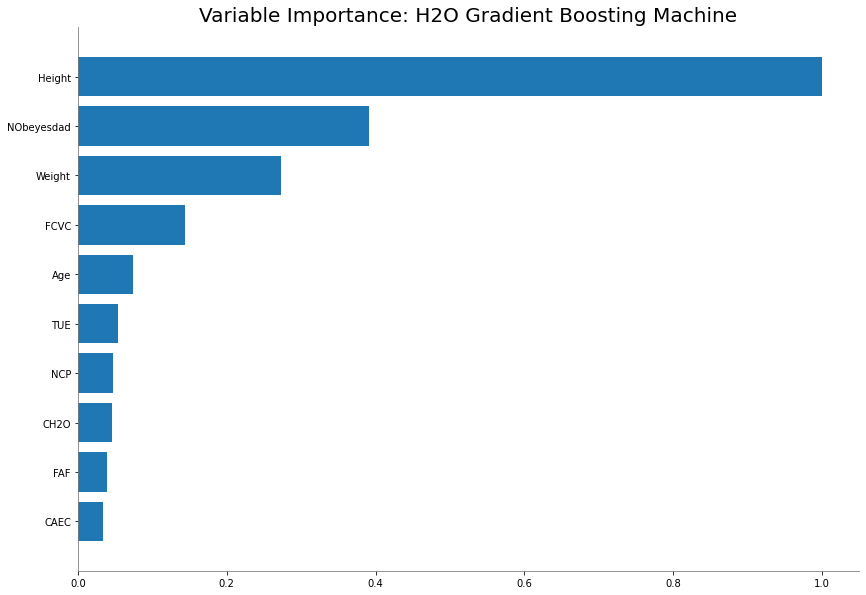

<Figure size 432x288 with 0 Axes>

In [ ]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.

In [ ]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#we are using xgboost model as well to predict, while it's still not in the top of the aml leader board.
#taken from references

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221108_15918


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.017736788083516714
RMSE: 0.1331795332756378
LogLoss: 0.07388191337026873
Mean Per-Class Error: 0.019804160419790107
AUC: 0.9984370314842579
AUCPR: 0.9984810972913339
Gini: 0.9968740629685158

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5696156024932861
        Female    Male    Error    Rate
------  --------  ------  -------  -------------
Female  715       10      0.0138   (10.0/725.0)
Male    19        717     0.0258   (19.0/736.0)
Total   734       727     0.0198   (29.0/1461.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.569616     0.980178  195
max f2                       0.285783     0.987055  226
max f0point5                 0.661769     0.986251  175
max accuracy                 0.569616     0.980151  195
max precision                0.99963      1         0
max recall                   0.113161     1         281
max specificity              0.99963      1         0
max absolute_mcc             0.569616     0.960375  195
max min_per_class_accuracy   0.521761     0.978261  201
max mean_per_class_accuracy  0.569616     0.980196  195
max tns                      0.99963      725       0
max fns                      0.99963      708       0
max fps                      0.000829804  725       399
max tps                      0.113161     736       281
max tnr                      0.99963      1         0
max fnr                      0.99963      0.961957  0
max fpr                      0.000829804  1         399
max tpr                      0.113161     1         281

Gains/Lift Table: Avg response rate: 50.38 %, avg score: 50.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102669                   0.99961            1.98505   1.98505            1                0.999669    1                           0.999669            0.0203804       0.0203804                  98.5054   98.5054            0.0203804
2        0.0205339                   0.999517           1.98505   1.98505            1                0.999577    1                           0.999623            0.0203804       0.0407609                  98.5054   98.5054            0.0407609
3        0.0301164                   0.999385           1.98505   1.98505            1                0.999445    1                           0.999566            0.0190217       0.0597826                  98.5054   98.5054            0.0597826
4        0.0403833                   0.999289           1.98505   1.98505            1                0.999335    1                           0.999508            0.0203804       0.080163                   98.5054   98.5054            0.080163
5        0.0506502                   0.999227           1.98505   1.98505            1                0.999258    1                           0.999457            0.0203804       0.100543                   98.5054   98.5054            0.100543
6        0.100616                    0.998368           1.98505   1.98505            1                0.99884     1                           0.99915             0.0991848       0.199728                   98.5054   98.5054            0.199728
7        0.150582                    0.996991        

In [ ]:

out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#taken from references

In [ ]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20221108_15918',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20221108_15918'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221108_15918_training_py_2_sid_8743',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221108_15918_training_py_2_sid_8743'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20221108_15918_training_py_2_sid_8743',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20221108_15918_training_py_2_sid_8743'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [ ]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [ ]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20221108_15918


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.017736788083516714
RMSE: 0.1331795332756378
LogLoss: 0.07388191337026873
Mean Per-Class Error: 0.019804160419790107
AUC: 0.9984370314842579
AUCPR: 0.9984810972913339
Gini: 0.9968740629685158

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5696156024932861
        Female    Male    Error    Rate
------  --------  ------  -------  -------------
Female  715       10      0.0138   (10.0/725.0)
Male    19        717     0.0258   (19.0/736.0)
Total   734       727     0.0198   (29.0/1461.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.569616     0.980178  195
max f2                       0.285783     0.987055  226
max f0point5                 0.661769     0.986251  175
max accuracy                 0.569616     0.980151  195
max precision                0.99963      1         0
max recall                   0.113161     1         281
max specificity              0.99963      1         0
max absolute_mcc             0.569616     0.960375  195
max min_per_class_accuracy   0.521761     0.978261  201
max mean_per_class_accuracy  0.569616     0.980196  195
max tns                      0.99963      725       0
max fns                      0.99963      708       0
max fps                      0.000829804  725       399
max tps                      0.113161     736       281
max tnr                      0.99963      1         0
max fnr                      0.99963      0.961957  0
max fpr                      0.000829804  1         399
max tpr                      0.113161     1         281

Gains/Lift Table: Avg response rate: 50.38 %, avg score: 50.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102669                   0.99961            1.98505   1.98505            1                0.999669    1                           0.999669            0.0203804       0.0203804                  98.5054   98.5054            0.0203804
2        0.0205339                   0.999517           1.98505   1.98505            1                0.999577    1                           0.999623            0.0203804       0.0407609                  98.5054   98.5054            0.0407609
3        0.0301164                   0.999385           1.98505   1.98505            1                0.999445    1                           0.999566            0.0190217       0.0597826                  98.5054   98.5054            0.0597826
4        0.0403833                   0.999289           1.98505   1.98505            1                0.999335    1                           0.999508            0.0203804       0.080163                   98.5054   98.5054            0.080163
5        0.0506502                   0.999227           1.98505   1.98505            1                0.999258    1                           0.999457            0.0203804       0.100543                   98.5054   98.5054            0.100543
6        0.100616                    0.998368           1.98505   1.98505            1                0.99884     1                           0.99915             0.0991848       0.199728                   98.5054   98.5054            0.199728
7        0.150582                    0.996991        

In [ ]:
print(out.confusion_matrix(train=True))
#confusuion matrix for xgboost method 
#mine

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5696156024932861
        Female    Male    Error    Rate
------  --------  ------  -------  -------------
Female  715       10      0.0138   (10.0/725.0)
Male    19        717     0.0258   (19.0/736.0)
Total   734       727     0.0198   (29.0/1461.0)


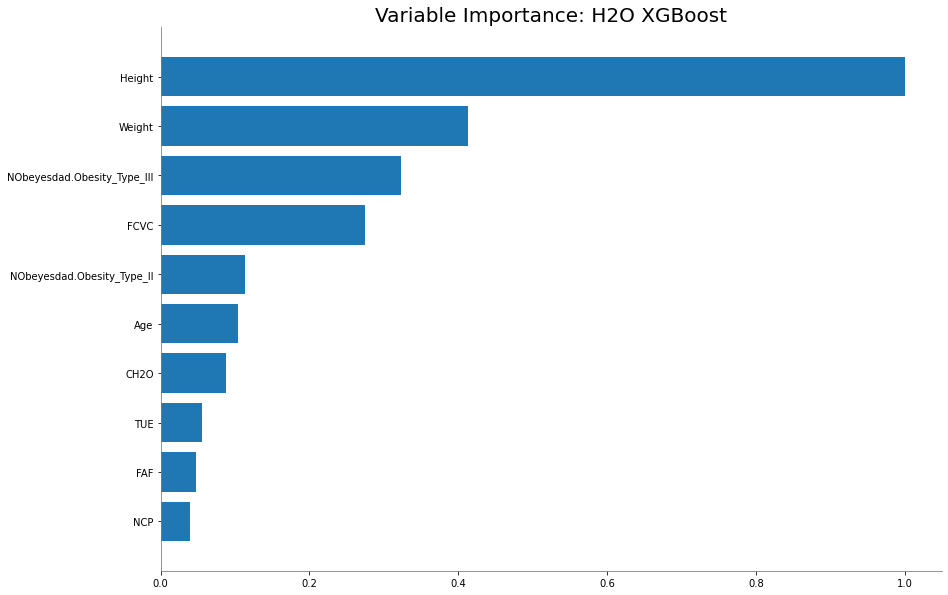

<Figure size 432x288 with 0 Axes>

In [ ]:
out.varimp_plot()
#taken from references

In [ ]:
aml.leader.download_mojo(path = "./")
#Downloading the deployment ready code in mojo format. For GBM model. 
#mine

'/content/GBM_2_AutoML_1_20221108_15918.zip'

**Conclusion**

**Evaluation:**  We can evaluaate our model by using the above confusion matrix from it we can say that the error and rate of error in the cofusion matrix are significantly low suggesting that the model is working perfectly. 

Also while evaluating all the model we can see that present leader model ("**GBM_2_AutoML_1_20221108_15918**") has the least amount of **mean_per_class_error** and **logloss** as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as height,weight and fcvc suggesting rents dependence on it. Also we know since the model thats involved GBM handles Overfitting finely as well. Probably the reason h2o choose it in the first place.

**1. Is the relationship significant?**

Statistical significance means that there is a good chance that we are right in finding that a relationship exists between two variables. We can observe from above that the dependent variable is dependent on variables such as weight and height . We can suggest that the relation ship is significant btw the dependant and independent variables.

**2. Are any model assumptions violated?**

To answer the above question we need to know answer to the below questions.

What Are the Assumptions of GBM(Gradient boosting model)?

1) Independence of observations

2) Assumptions related to the interaction depth. If set to 1, strictly additive model is assumed. As we increase the interaction depth, this assumption is relaxed.

What Are the Assumptions of XGBoost?

1)XGBoost may assume that encoded integer values for each input variable have an ordinal relationship

2)XGBoost assume that your data may not be complete (i.e. it can deal with missing values)

So from above we can say, that every while many variables are real in nature still they can be assumed into finite interval, there by it won't be problem assuming it is ordinal. Similary for GBM model every observation in the dataset as we know are differnt and not dependent on other observations as well. 

So, no assumptions of either GBM or XGBoost model are Violated here.

**3. Is there any multicollinearity in the model?**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a  model. while height and weight have the highest variable correlation it is still not enough to suggest that their is collinearity between them. 

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

From above correlation we can see that

Height  NCP       0.243672

FAF     Height    0.294709

Height  Weight    0.463136

TUE     Age      -0.296931
these variables are the one with correlation. and Independent variables have both zero covariance and correlation. While they may be dependent on each other a bit, It its still not significant enough to call them dependent varaibles.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Most Importatnt Variables: **

Height

NObeyesdad

Weight

FCVC

are the most importatnt variables for predicitng the obesity levels.



**6. Does the model make sense?**

Yes as we can see that the gender depending on weight and height etc we can undersatad that the model in sensible. 



**7. Does regularization help?**

Regularization helps by ignificantly reducing the variance of the model, without substantial increase in its bias. it is reducing the variance(hence avoiding overfitting), without loosing any important properties in the data.

**8. Which independent variables are significant?**

Weight and Height are the most significant variables of all.

**9. Which hyperparameters are important?**

max_models and exclude_algos are the most important hyperparameters as they save us a lot of time here. 

**Reference**:

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb